In [ ]:
!pip install sastrawi
!pip install transformers
!pip install gdown
!pip install emoji


In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import pandas as pd    # digunakan untuk manipulasi dan analisis data
import matplotlib.pyplot as plt   # digunakan untuk visualisasi data
import seaborn as sns   # juga digunakan untuk visualisasi data



from sklearn.model_selection import(   # digunakan untuk validasi silang dan hyperparameter tuning
    train_test_split,
    RandomizedSearchCV,
    cross_val_score,
)


import math
import warnings



import time




import pickle
import re

import pyarrow.feather as feather
import pandas as pd

import pyarrow as pa
import pyarrow.parquet as pq

# from nltk.tokenize import word_tokenize

import string
import sys
# sys.path.append('/content/indonlu')
# from transformers import  BertConfig, BertTokenizer,BertForSequenceClassification


import torch
from torch import optim


import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import defaultdict

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from wordcloud import WordCloud

#Model IndoBERT
import random
import torch
import torch.nn.functional as F
from torch import optim
from tqdm import tqdm
import spacy
from spacy.lang.id import Indonesian
from spacy.lang.id.stop_words import STOP_WORDS

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
# from indonlu.utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader
# from indonlu.utils.forward_fn import forward_sequence_classification
# from indonlu.utils.metrics import document_sentiment_metrics_fn

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:


text_with_emoji = "Saya senang 😊"

print(text_without_emoji)


# Importing Necessary File from google drive


In [39]:
import gdown
import pandas as pd

In [40]:
data_url='https://drive.google.com/uc?id=1_gSqKGrO-yMpklv1hecQ407mCDFNQbWB'
data_path='data.csv'
kamus_alay_url='https://drive.google.com/uc?id=14M5i-Dd_oFCCJf4avgTEQeZLO5PCKCzy'
kamus_alay_path='kamus_alay.csv'
kamus_singkatan_url='https://drive.google.com/uc?id=1f1aOazCYJXCnhg7Brf5GelE7yE8-QflK'
kamus_singkatan_path='kamus_singkatan.csv'
gdown.download(data_url, data_path, quiet=False)
gdown.download(kamus_alay_url, kamus_alay_path, quiet=False)
gdown.download(kamus_singkatan_url, kamus_singkatan_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1_gSqKGrO-yMpklv1hecQ407mCDFNQbWB
To: /kaggle/working/data.csv
100%|██████████| 925k/925k [00:00<00:00, 1.73MB/s]
Downloading...
From: https://drive.google.com/uc?id=14M5i-Dd_oFCCJf4avgTEQeZLO5PCKCzy
To: /kaggle/working/kamus_alay.csv
100%|██████████| 3.09M/3.09M [00:00<00:00, 4.44MB/s]
Downloading...
From: https://drive.google.com/uc?id=1f1aOazCYJXCnhg7Brf5GelE7yE8-QflK
To: /kaggle/working/kamus_singkatan.csv
100%|██████████| 18.9k/18.9k [00:00<00:00, 44.6MB/s]


'kamus_singkatan.csv'

In [41]:
df=pd.read_csv("data.csv")

In [42]:
# Split the data into labeled and unlabeled
labeled_data = df.dropna(subset=["label"])
unlabeled_data = df[df["label"].isna()]


In [43]:
labeled_data[labeled_data['label']=='sadness']

,label,tweet
5,sadness,beli kaos banyak dengan ukuran yg udah downgra...
8,sadness,"Percaya kata lelaki itu, terutama ketika aku i..."
9,sadness,ada saatnya sakit hati itu kita nikmatin denga...
11,sadness,"Semalem pake baff, kaos tangan, sepatu lengkap..."
12,sadness,Bagi rapot itu batin haha misalnya nih indikat...
...,...,...
4132,sadness,Ketika kamu melihat senyum di wajah orang lain...
4135,sadness,Rasa kesepian dan kehilangan ini membuatku mer...
4139,sadness,"Turut Berduka, Atas Gempa di Lombok. Sepertiny..."
4141,sadness,Akan selalu ada halangan dan rintangan yang ak...


# Data Cleaning

Some of the data contain USERNAME, URL, Lets remove this

In [ ]:

# Fungsi untuk menghitung kata yang dimask dalam sebuah teks
def count_masked_words(text):
    if isinstance(text, str):
        pattern = r'\[USERNAME\]|\[USER\]'  # Pola regex untuk mencari [USERNAME] atau [USER]
        matches = re.findall(pattern, text)
        return len(matches)
    else:
        return 0  # Jika nilai tidak bertipe string, kembalikan 0

# Menerapkan fungsi ke kolom teks dalam DataFrame
labeled_data['masked_word_count'] = labeled_data['tweet'].apply(count_masked_words)

# Jumlah kata yang dimask dalam keseluruhan dataset
total_masked_words = labeled_data['masked_word_count'].sum()

print("Total kata yang dimask dalam dataset:", total_masked_words)

In [ ]:
# Fungsi untuk menemukan dan menghitung pola yang diawali dengan tanda kurung siku dalam sebuah teks
def find_and_count_patterns(text):
    if isinstance(text, str):
        pattern = r'\[([^]]+)\]'  # Pola regex untuk mencari semua pola yang diawali dengan tanda kurung siku
        matches = re.findall(pattern, text)

        # Menghitung jumlah kemunculan setiap pola
        pattern_counts = {}
        for match in matches:
            if match in pattern_counts:
                pattern_counts[match] += 1
            else:
                pattern_counts[match] = 1

        return pattern_counts
    else:
        return {}  # Jika nilai tidak bertipe string, kembalikan dictionary kosong

# Menerapkan fungsi ke kolom teks dalam DataFrame
labeled_data['pattern_counts'] = labeled_data['tweet'].apply(find_and_count_patterns)

# Menggabungkan hasil dari semua tweet menjadi satu dictionary
all_patterns_counts = {}
for pattern_count in labeled_data['pattern_counts']:
    for pattern, count in pattern_count.items():
        if pattern in all_patterns_counts:
            all_patterns_counts[pattern] += count
        else:
            all_patterns_counts[pattern] = count


In [ ]:
# Membuat barplot
patterns = list(all_patterns_counts.keys())
counts = list(all_patterns_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(patterns, counts)
plt.xlabel('Pola yang Diawali dengan Tanda Kurung Siku')
plt.ylabel('Jumlah Kemunculan')
plt.title('Barplot Jumlah Kemunculan Pola dalam Dataset')
plt.xticks(rotation=90)  # Agar label sumbu x lebih mudah dibaca
plt.tight_layout()

# Menampilkan plot
plt.show()

Saya penasaran dengan askmf, mari kita coba cari apa ini

In [ ]:

# Fungsi untuk mencetak tweet yang mengandung pola [askmf]
def print_tweets_with_pattern(text):
    if isinstance(text, str):
        if '[askmf]' in text:
            print(text)

# Menerapkan fungsi ke kolom teks dalam DataFrame
labeled_data['tweet'].apply(print_tweets_with_pattern)

askmf adalah tweet menfess, kita bisa hilangkan saja

In [ ]:

# Fungsi untuk mencetak tweet yang mengandung pola [askmf]
def print_tweets_with_pattern(text):
    if isinstance(text, str):
        if '[Habis buka Facebook]' in text:
            print(text)

# Menerapkan fungsi ke kolom teks dalam DataFrame
labeled_data['tweet'].apply(print_tweets_with_pattern)

## Removing data []

In [ ]:
all_patterns_counts

In [11]:
kamus_alay=pd.read_csv(kamus_alay_path)
kamus_alay=kamus_alay.rename(columns = {'slang' : 'kamus_slang' , 'formal' : 'kamus_perbaikan'})
# Rekonstruksi data sebagai 'dict'
slang_mapping = dict(zip(kamus_alay['kamus_slang'], kamus_alay['kamus_perbaikan']))
kamus_singkatan = pd.read_csv(kamus_singkatan_path, header=None, names=['sebelum_perbaikan', 'setelah_perbaikan'],delimiter=';')
singkatan_mapping=dict(zip(kamus_singkatan['sebelum_perbaikan'],kamus_singkatan['setelah_perbaikan']))

In [12]:
excluded_stopwords = [
    "tidak",
    "bukan",
    "jangan",
    "tak",
    "belum",
    "tidak ada",
    "tidak pernah",
    "justru",
    "malah",
    "hanya",
    "saja",
    "sungguh",
    "amat",
    "terlalu",
    "benar-benar",
    "sangat",
    "sekali",
    "ternyata",
    "tadinya",
    "bahwa",
    "apabila",
    "jika",
    "jikalau",
    "seandainya",
    "sekiranya",
    "sejak",
    "semenjak",
    "sewaktu",
    "sebelum",
    "sesudah",
    "selesai",
    "ketika",
    "kemudian",
    "setelah",
    "sementara",
    "begitu",
    "demikian",
    "seperti",
    "serupa",
    "mirip",
    "sama",
    "seolah-olah",
    "akan",
    "mau",
    "mesti",
    "harus",
    "perlu",
    "patut",
    "boleh",
    "dapat",
    "bisa",
    "mampu",
    "sebaiknya",
    "seharusnya",
    "sempat",
    "tahu",
    "tahulah",
    "ketahui",
    "tandanya",
    "yaitu",
    "adalah",
    "namun",
    "ga"
]


In [13]:
labeled_data.tail(100)


,label,tweet
4053,fear,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...
4054,anger,hina saja aku terus! lama lama aku muak dengan...
4055,fear,[askmf] kamu kalo pergi ke psikolog pertamanya...
4056,anger,Baru kali ini nemu temen mau buka bisnis yg sa...
4057,fear,Harap diperjelas Pak Ketua [USERNAME] agar mas...
...,...,...
4148,anger,sini berobat sama saya ini ngantri dokter saja...
4149,joy,Selamat pagi generasi Tik Tok yang kadang kepa...
4150,love,"Salah satu sahabat terbaik! Teman, kakak, insp..."
4151,anger,[USERNAME] Gila kok ada ya perempuan pikiranny...


In [16]:
# Menggunakan kamus kata gaul Salsabila
from Sastrawi.StopWordRemover.StopWordRemoverFactory import  StopWordRemoverFactory
import emoji
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()
# List of words with negation meaning
data = emoji.EMOJI_DATA

# Remove negation words from stopwords
stopwords = set(stopwords).difference(excluded_stopwords)
nlp = Indonesian()
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [43]:
# Teks dengan emoji
text_with_emoji = "Saat kamu merenungkan tentang kehilangan yang pernah kamu alami, luka-luka itu terasa kembali dalam ingatan. 💔🌼 #RememberingLoss"

# Fungsi untuk mengganti emoji dengan representasi ASCII sesuai dengan data emoji
def replace_emoji_with_ascii(text, emoji_data, language='id'):
    for emoji, translations in emoji_data.items():
        if language in translations:
            text = text.replace(emoji, translations[language])
#             text=text.replace(':','')
#             text=text.replace('_',' ')
#             text = text.replace(':', '').replace('_', ' ')
    
            
       
    return text
text_with_ascii = replace_emoji_with_ascii(text_with_emoji, data, language='id')

text_with_spaces=text_with_ascii.replace(":",'mask').replace('_','mask2').strip()
text_without_extra_spaces = re.sub(' +', ' ', text_with_spaces)

# Menghilangkan spasi di awal dan akhir teks
text_without_extra_spaces = text_without_extra_spaces.strip()
def process_tweet(tweet) :
  tweet=tweet.lower()
  tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
  tweet = re.sub(r'\[username\]|\[url\]|\[askmf\]|\[sensitive-no\]|\[satu menit kemudian\]|\[seo in ha, love rain\]|\[bb\]|\[c48\]|\[idm\]', '', tweet)
  tweet=replace_emoji_with_ascii(tweet,data)
  tweet=tweet.replace(":",' ').replace('_','mask').replace('-','rus').strip()
  tweet=re.sub(' +', ' ', tweet)
  tokens = tweet.split()
  tweet_tokens = []
  for ele in tokens:
    ele_kamus = kamus_singkatan.get(ele, ele)
    ele_slang = slang_mapping.get(ele_kamus, ele_kamus)
    tweet_tokens.append(ele_slang)

  tweet = ' '.join(tweet_tokens)
  tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
  tweet = re.sub(r'#([^\s]+)', '', tweet)
  tweet=re.sub(r'\d+', '', tweet)
  tweet = tweet.strip('\'"')
  tweet = tweet.lstrip('\'"')

  tweet = "".join([char for char in tweet if char not in string.punctuation])

  doc = nlp(tweet)
  tokens = [token.text for token in doc]
      # Hapus stopwords dari tokens
  filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
  tweet = ' '.join(filtered_tokens)
  
  tweet=stemmer.stem(tweet)
  tweet=tweet.replace('mask',' ').replace('rus','-')


  return tweet

In [44]:
text_with_emoji = "Saat kamu merenungkan tentang kehilangan yang sangat amat kemaluan pernah kamu alami, luka-luka itu terasa kembali dalam ingatan. 💔🌼 #RememberingLoss"
process_tweet(labeled_data['tweet'].iloc[19])

'momen mana kamu rasa seperti semua kamu ingin adalah luap marah ampun wajah bersungguh-sungguh marah'

In [45]:
labeled_data['cleaned_tweet']=labeled_data['tweet'].apply(lambda x: process_tweet(str(x)))

/tmp/ipykernel_32/961053447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_data['cleaned_tweet']=labeled_data['tweet'].apply(lambda x: process_tweet(str(x)))


In [48]:
labeled_data.to_csv("cleaned_labeled_data_emoji_space_with_singkatan.csv")

In [47]:
unlabeled_data['cleaned_tweet']=unlabeled_data['tweet'].apply(lambda x: process_tweet(str(x)))

/tmp/ipykernel_32/4099353285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled_data['cleaned_tweet']=unlabeled_data['tweet'].apply(lambda x: process_tweet(str(x)))


In [49]:
unlabeled_data.to_csv("cleaned_unlabeled_data_emoji_space_with_singkatan.csv")

# Splitting Data

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labeled_data['cleaned_tweet'],labeled_data['label'], test_size=0.2, random_state=42)


In [51]:
# Training data
train_df = pd.DataFrame({"tweet": X_train, "label": y_train})
train_df.to_csv("train_emoji_space_with_singkatan.tsv", sep="\t", index=False,header=False)

# Test data
test_df = pd.DataFrame({"tweet": X_test, "label": y_test})
test_df.to_csv("valid_emoji_space_with_singkatan.tsv",  sep='\t',index=False,header=False)


In [5]:
import gdown
train_df_url='https://drive.google.com/uc?id=19A4jIhGTs_ekC-Fb4uc7gz4YrRSpnQoR'
train_df_url_path='train_df.tsv'
valid_df_url='https://drive.google.com/uc?id=1U5KhxPQbndN4pyqI8Kiea1W1Rivp4yj7'
valid_df_url_path='valid_df.tsv'
gdown.download(train_df_url, train_df_url_path, quiet=False)
gdown.download(valid_df_url, valid_df_url_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=19A4jIhGTs_ekC-Fb4uc7gz4YrRSpnQoR
To: /kaggle/working/train_df.tsv
100%|██████████| 681k/681k [00:00<00:00, 100MB/s]
Downloading...
From: https://drive.google.com/uc?id=1U5KhxPQbndN4pyqI8Kiea1W1Rivp4yj7
To: /kaggle/working/valid_df.tsv
100%|██████████| 290k/290k [00:00<00:00, 93.1MB/s]


'valid_df.tsv'

In [6]:

train_df=pd.read_csv(train_df_url_path)
test_df=pd.read_csv(valid_df_url_path)

In [11]:
train_df

,akhir nya costum aku datang sekian lama tunggu paling suka banget blakang buka depan buka yuk mau bo hari mau isi slot buat malam minggu langsung dm saja wajib dp\tjoy
0,duwet maut ibarat bintang sepak bola belgia ha...
1,aku jatuh cinta pandang mata\tlove
2,fase begini tiba-tiba mood melow-nangis-pengen...
3,sedih banget lihat xiaojun minta maaf wayv bel...
4,ketika kamu dapat feedback positif atas karya ...
...,...
6357,nelayan sejahtera rakyat bahagiasemangaatt gus...
6358,pokok semangat sek\tjoy
6359,moga quarter life crisis segera lalu yaa seman...
6360,som terima oppa apa ada kok tenang saja mau al...


## Load Data Using DataLoader

In [7]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics import accuracy_score, f1_score


# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, file_path):
        self.data, self.labels = self.load_data(file_path)
        self.tokenizer = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            padding="max_length",
            truncation=True,
            max_length=512,
            return_tensors="pt"
        )
        input_ids = encoding["input_ids"].squeeze()
        attention_mask = encoding["attention_mask"].squeeze()

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": label
        }

    def load_data(self, file_path):
        data = []
        labels = []
        label_mapping = {"fear": 1, "joy": 2, "love": 3,'sadness':4,'anger':5}  # Define your label mapping here
        with open(file_path, "r", encoding="utf-8") as file:
            lines = file.readlines()
            for line in lines:
                parts = line.strip().split("\t")

                if len(parts) == 2:
                    text, label = parts
                    data.append(text)
                    labels.append(label_mapping[label])
        return data, labels



# Define the paths to your datasets
train_dataset_path = train_df_url_path
valid_dataset_path = valid_df_url_path


# Instantiate the custom datasets
train_dataset = CustomDataset(train_dataset_path)
valid_dataset = CustomDataset(valid_dataset_path)

# Define the data loaders
batch_size = 16 # Adjust the batch size as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)



In [1]:
from transformers import AutoTokenizer, AutoModel
tokenizer2 = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")
model2 = AutoModel.from_pretrained("indolem/indobertweet-base-uncased")

## Training

In [9]:

import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics import accuracy_score, f1_score
from collections import defaultdict
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
loss_fn = CrossEntropyLoss()


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model2.to(device)
optimizer = Adam(model2.parameters(), lr=3e-6)  # Define the optimizer

num_epochs = 15 # Adjust the number of epochs as needed
history2 = defaultdict(list)

for epoch in range(num_epochs):
    epoch_loss = 0.0
    all_predictions = []
    all_labels = []
    model2.train()

    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training")

    for batch in train_loader_tqdm:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()

        outputs = model2(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.last_hidden_state[:, 0, :]

        loss = loss_fn(logits,labels)


        epoch_loss += loss.item()

        loss.backward()
        optimizer.step()

        predictions = torch.argmax(logits, dim=1).cpu().tolist()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().tolist())

    train_accuracy = accuracy_score(all_labels, all_predictions)
    train_f1_score = f1_score(all_labels, all_predictions, average='weighted')
    train_error = 1 - train_accuracy

    print(f"Epoch {epoch+1}/{num_epochs} - Training Loss: {epoch_loss / len(train_loader)}")
    print(f"Epoch {epoch+1}/{num_epochs} - Training Accuracy: {train_accuracy}")
    print(f"Epoch {epoch+1}/{num_epochs} - Training F1 Score: {train_f1_score}")
    print(f"Epoch {epoch+1}/{num_epochs} - Training Error: {train_error}")

    if valid_loader:
        model2.eval()
        validation_loss = 0.0
        all_predictions = []
        all_labels = []

        valid_loader_tqdm = tqdm(valid_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation")

        with torch.no_grad():
            for batch in valid_loader_tqdm:
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)
                labels = batch["labels"].to(device)

                outputs = model2(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs.last_hidden_state[:, 0, :]

                loss = loss_fn(logits,labels)
                validation_loss += loss.item()

                predictions = torch.argmax(logits, dim=1).cpu().tolist()
                all_predictions.extend(predictions)
                all_labels.extend(labels.cpu().tolist())

        valid_accuracy = accuracy_score(all_labels, all_predictions)
        valid_f1_score = f1_score(all_labels, all_predictions, average='weighted')
        valid_error = 1 - valid_accuracy

        print(f"Epoch {epoch+1}/{num_epochs} - Validation Loss: {validation_loss / len(valid_loader)}")
        print(f"Epoch {epoch+1}/{num_epochs} - Validation Accuracy: {valid_accuracy}")
        print(f"Epoch {epoch+1}/{num_epochs} - Validation F1 Score: {valid_f1_score}")
        print(f"Epoch {epoch+1}/{num_epochs} - Validation Error: {valid_error}")

    # Store metrics in history2
    history2['train_loss'].append(epoch_loss / len(train_loader))
    history2['train_accuracy'].append(train_accuracy)
    history2['train_f1_score'].append(train_f1_score)
    history2['train_error'].append(train_error)
    history2['valid_loss'].append(validation_loss / len(valid_loader))
    history2['valid_accuracy'].append(valid_accuracy)
    history2['valid_f1_score'].append(valid_f1_score)
    history2['valid_error'].append(valid_error)


Epoch 1/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 1/15 - Training Loss: 3.3390022716929564
Epoch 1/15 - Training Accuracy: 0.2905862014772906
Epoch 1/15 - Training F1 Score: 0.2974448685283736
Epoch 1/15 - Training Error: 0.7094137985227094


Epoch 1/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]


Epoch 1/15 - Validation Loss: 1.2472840251281248
Epoch 1/15 - Validation Accuracy: 0.5856252291895856
Epoch 1/15 - Validation F1 Score: 0.587581697902511
Epoch 1/15 - Validation Error: 0.4143747708104144


Epoch 2/15 - Training: 100%|██████████| 398/398 [05:35<00:00,  1.19it/s]


Epoch 2/15 - Training Loss: 1.6079118623955166
Epoch 2/15 - Training Accuracy: 0.5827439886845828
Epoch 2/15 - Training F1 Score: 0.5823470137460225
Epoch 2/15 - Training Error: 0.41725601131541723


Epoch 2/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.41it/s]


Epoch 2/15 - Validation Loss: 0.8245625790448217
Epoch 2/15 - Validation Accuracy: 0.720938760542721
Epoch 2/15 - Validation F1 Score: 0.7195838959813543
Epoch 2/15 - Validation Error: 0.279061239457279


Epoch 3/15 - Training: 100%|██████████| 398/398 [05:35<00:00,  1.19it/s]


Epoch 3/15 - Training Loss: 1.187937552867523
Epoch 3/15 - Training Accuracy: 0.6877259154486878
Epoch 3/15 - Training F1 Score: 0.6877957861646729
Epoch 3/15 - Training Error: 0.3122740845513122


Epoch 3/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.41it/s]


Epoch 3/15 - Validation Loss: 0.7268541232622855
Epoch 3/15 - Validation Accuracy: 0.77007700770077
Epoch 3/15 - Validation F1 Score: 0.769707312419086
Epoch 3/15 - Validation Error: 0.22992299229922997


Epoch 4/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 4/15 - Training Loss: 1.0711897704095097
Epoch 4/15 - Training Accuracy: 0.7235580700927235
Epoch 4/15 - Training F1 Score: 0.7239940854190299
Epoch 4/15 - Training Error: 0.27644192990727645


Epoch 4/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]


Epoch 4/15 - Validation Loss: 0.7228184940173612
Epoch 4/15 - Validation Accuracy: 0.7777777777777778
Epoch 4/15 - Validation F1 Score: 0.7771982228364674
Epoch 4/15 - Validation Error: 0.2222222222222222


Epoch 5/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 5/15 - Training Loss: 0.9501452890210714
Epoch 5/15 - Training Accuracy: 0.752003771805752
Epoch 5/15 - Training F1 Score: 0.7521759502802812
Epoch 5/15 - Training Error: 0.24799622819424805


Epoch 5/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]


Epoch 5/15 - Validation Loss: 0.7886120656951826
Epoch 5/15 - Validation Accuracy: 0.7645764576457645
Epoch 5/15 - Validation F1 Score: 0.7667649689214544
Epoch 5/15 - Validation Error: 0.23542354235423546


Epoch 6/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 6/15 - Training Loss: 0.8707410108728625
Epoch 6/15 - Training Accuracy: 0.772905862014773
Epoch 6/15 - Training F1 Score: 0.7733254656777546
Epoch 6/15 - Training Error: 0.22709413798522704


Epoch 6/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]


Epoch 6/15 - Validation Loss: 0.7541506465154084
Epoch 6/15 - Validation Accuracy: 0.7847451411807848
Epoch 6/15 - Validation F1 Score: 0.7842835659702844
Epoch 6/15 - Validation Error: 0.21525485881921524


Epoch 7/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 7/15 - Training Loss: 0.7755002128943127
Epoch 7/15 - Training Accuracy: 0.7917648907747917
Epoch 7/15 - Training F1 Score: 0.7921354896773015
Epoch 7/15 - Training Error: 0.20823510922520827


Epoch 7/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]


Epoch 7/15 - Validation Loss: 0.7633079603445112
Epoch 7/15 - Validation Accuracy: 0.7825449211587825
Epoch 7/15 - Validation F1 Score: 0.7817836830212354
Epoch 7/15 - Validation Error: 0.2174550788412175


Epoch 8/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 8/15 - Training Loss: 0.70377510960153
Epoch 8/15 - Training Accuracy: 0.8015087223008015
Epoch 8/15 - Training F1 Score: 0.801880231128282
Epoch 8/15 - Training Error: 0.1984912776991985


Epoch 8/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]


Epoch 8/15 - Validation Loss: 0.8079104064065113
Epoch 8/15 - Validation Accuracy: 0.7862119545287862
Epoch 8/15 - Validation F1 Score: 0.785466647223933
Epoch 8/15 - Validation Error: 0.21378804547121377


Epoch 9/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 9/15 - Training Loss: 0.6210987993548788
Epoch 9/15 - Training Accuracy: 0.826025459688826
Epoch 9/15 - Training F1 Score: 0.8263190410221399
Epoch 9/15 - Training Error: 0.173974540311174


Epoch 9/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.41it/s]


Epoch 9/15 - Validation Loss: 0.7897524835422025
Epoch 9/15 - Validation Accuracy: 0.7880454712137881
Epoch 9/15 - Validation F1 Score: 0.7883667772228765
Epoch 9/15 - Validation Error: 0.2119545287862119


Epoch 10/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 10/15 - Training Loss: 0.5777420045798598
Epoch 10/15 - Training Accuracy: 0.8431557441458432
Epoch 10/15 - Training F1 Score: 0.8434415744141707
Epoch 10/15 - Training Error: 0.15684425585415684


Epoch 10/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]


Epoch 10/15 - Validation Loss: 0.8505081421537706
Epoch 10/15 - Validation Accuracy: 0.7865786578657866
Epoch 10/15 - Validation F1 Score: 0.7866868201189307
Epoch 10/15 - Validation Error: 0.21342134213421338


Epoch 11/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 11/15 - Training Loss: 0.5107714090515022
Epoch 11/15 - Training Accuracy: 0.8576143328618576
Epoch 11/15 - Training F1 Score: 0.8579034957988311
Epoch 11/15 - Training Error: 0.14238566713814238


Epoch 11/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]


Epoch 11/15 - Validation Loss: 0.8776794341746826
Epoch 11/15 - Validation Accuracy: 0.7814448111477814
Epoch 11/15 - Validation F1 Score: 0.7821257978953298
Epoch 11/15 - Validation Error: 0.21855518885221858


Epoch 12/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 12/15 - Training Loss: 0.47118413098268774
Epoch 12/15 - Training Accuracy: 0.8741159830268741
Epoch 12/15 - Training F1 Score: 0.8744361932179581
Epoch 12/15 - Training Error: 0.1258840169731259


Epoch 12/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.41it/s]


Epoch 12/15 - Validation Loss: 0.8798305436925232
Epoch 12/15 - Validation Accuracy: 0.7865786578657866
Epoch 12/15 - Validation F1 Score: 0.7861478664946808
Epoch 12/15 - Validation Error: 0.21342134213421338


Epoch 13/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 13/15 - Training Loss: 0.38707905092356193
Epoch 13/15 - Training Accuracy: 0.8940751217978941
Epoch 13/15 - Training F1 Score: 0.8944412292979782
Epoch 13/15 - Training Error: 0.10592487820210594


Epoch 13/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]


Epoch 13/15 - Validation Loss: 0.9195267216939675
Epoch 13/15 - Validation Accuracy: 0.7887788778877888
Epoch 13/15 - Validation F1 Score: 0.7891963830612733
Epoch 13/15 - Validation Error: 0.21122112211221122


Epoch 14/15 - Training: 100%|██████████| 398/398 [05:36<00:00,  1.18it/s]


Epoch 14/15 - Training Loss: 0.36279521179713087
Epoch 14/15 - Training Accuracy: 0.9028760018859029
Epoch 14/15 - Training F1 Score: 0.9031904619219537
Epoch 14/15 - Training Error: 0.09712399811409711


Epoch 14/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]


Epoch 14/15 - Validation Loss: 0.9659269650450402
Epoch 14/15 - Validation Accuracy: 0.7854785478547854
Epoch 14/15 - Validation F1 Score: 0.7851568430868895
Epoch 14/15 - Validation Error: 0.21452145214521456


Epoch 15/15 - Training: 100%|██████████| 398/398 [05:37<00:00,  1.18it/s]


Epoch 15/15 - Training Loss: 0.34928645652452084
Epoch 15/15 - Training Accuracy: 0.9053905390539054
Epoch 15/15 - Training F1 Score: 0.9060722699553769
Epoch 15/15 - Training Error: 0.09460946094609457


Epoch 15/15 - Validation: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]

Epoch 15/15 - Validation Loss: 0.988920488446537
Epoch 15/15 - Validation Accuracy: 0.7909790979097909
Epoch 15/15 - Validation F1 Score: 0.7910048273803482
Epoch 15/15 - Validation Error: 0.20902090209020907


In [32]:
history2

defaultdict(list,
            {'train_loss': [4.089868155809549,
              2.079806110606744,
              1.7510964133991644,
              1.6237933670098965,
              1.361299919967468,
              1.222501840442419,
              1.0995834077923343,
              0.9885309957540952,
              0.9514225972816348,
              0.8947032405636631,
              0.8389201891393616,
              0.741444841457101,
              0.7064142925306581,
              0.6039942755148962,
              0.563079375666208],
             'train_accuracy': [0.2273411623005119,
              0.37669376693766937,
              0.5103884372177055,
              0.5775368864799759,
              0.6278229448961157,
              0.6648599819331527,
              0.694068051791629,
              0.7241794640168624,
              0.7383318277627221,
              0.7557964468533575,
              0.7675398976211985,
              0.8000602228244504,
              0.8054802770249925,
   

In [28]:

train_df=pd.read_csv(train_df_url_path,delimiter='\t',names=['tweet','label'])
test_df=pd.read_csv(valid_df_url_path,delimiter='\t',names=['tweet','label'])

In [37]:
sadness_rows = test_df[test_df['label'] == 'sadness']


In [10]:
# Save the dictionary to a file
with open("Indobert_final.pickle", "wb") as file:
    pickle.dump(history2, file)

In [46]:
with open("my_dict.pickle", "rb") as file:
    loaded_dict = pickle.load(file)




In [47]:
 loaded_dict

defaultdict(list,
            {'train_loss': [4.089868155809549,
              2.079806110606744,
              1.7510964133991644,
              1.6237933670098965,
              1.361299919967468,
              1.222501840442419,
              1.0995834077923343,
              0.9885309957540952,
              0.9514225972816348,
              0.8947032405636631,
              0.8389201891393616,
              0.741444841457101,
              0.7064142925306581,
              0.6039942755148962,
              0.563079375666208],
             'train_accuracy': [0.2273411623005119,
              0.37669376693766937,
              0.5103884372177055,
              0.5775368864799759,
              0.6278229448961157,
              0.6648599819331527,
              0.694068051791629,
              0.7241794640168624,
              0.7383318277627221,
              0.7557964468533575,
              0.7675398976211985,
              0.8000602228244504,
              0.8054802770249925,
   

In [12]:
model2.save_pretrained("model_final_indoberttweet_emoji_space")

# Save the history to history2
torch.save(history2, "history_final_indobertweet_emoji_space")
torch.save(model2.state_dict(),'model_final_save_IndoBertTweet_emoji_space_fix.pth')

In [13]:
import zipfile

# Define the file paths for the model, history, and model weights
model_path = "/kaggle/working/model_final_indoberttweet_emoji_space"
history_path = "/kaggle/working/history_final_indobertweet_emoji_space"
model_weights_path = "/kaggle/working/model_final_save_IndoBertTweet_emoji_space_fix.pth"
output_zip_file = "indoberttweet_final_archive_emoji.zip"

# Create a ZIP archive and add files to it
with zipfile.ZipFile(output_zip_file, "w", zipfile.ZIP_DEFLATED) as archive:
    archive.write(model_path, arcname="model_final_indoberttweet_emoji_space")
    archive.write(history_path, arcname="history_final_indoberttweet_emoji_space")
    archive.write(model_weights_path, arcname="model_final_save_IndoBertTweet_emoji_space_fix.pth")

print(f"ZIP archive '{output_zip_file}' created successfully.")


ZIP archive 'indoberttweet_final_archive_emoji.zip' created successfully.


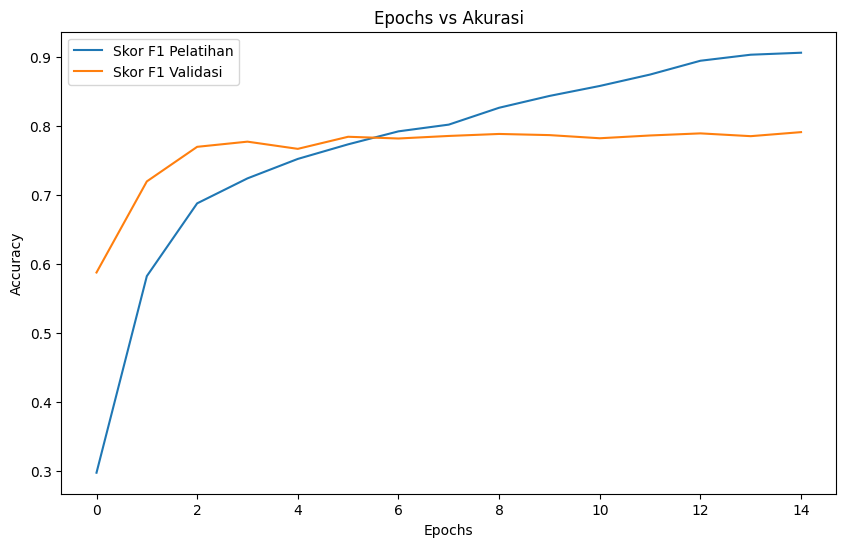

In [27]:



# Assuming you have a dictionary named history2 with your data
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each data series as a line with the desired label
for key, values in history2.items():
    if key == 'train_f1_score':
        ax.plot(values, label='Skor F1 Pelatihan')
    elif key == 'valid_f1_score':
        ax.plot(values, label='Skor F1 Validasi')

# Add a legend
ax.legend()

# Add labels and a title
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Epochs vs Akurasi')
plt.savefig('f1.png')

# Show the plot
plt.show()

In [50]:
# Assuming you have already loaded your trained model 'model2' and tokenizer 'tokenizer'
reverse_label={
    1: 'fear',
    2: 'joy',
    3: 'love',
    4: 'sadness',
    5: 'anger'
}
# Define the input text
input_text = "J1bln 2x putus berapa lama memang kamu jadian dia labil sangat ki bentar2 marahan begitu deh :"

# Tokenize the input text
inputs = tokenizer2(input_text, return_tensors="pt", padding=True, truncation=True)

# Move the input tensors to the same device as the model
inputs = {key: val.to(device) for key, val in inputs.items()}

# Set the model to evaluation mode
model2.eval()

# Perform inference
with torch.no_grad():
    outputs = model2(**inputs)

# Process the model's output as needed
logits = outputs.last_hidden_state[:, 0, :]
predicted_class = torch.argmax(logits, dim=1).item()

# Optionally, you can map the predicted class to its corresponding label if you have label mapping
# label_map = {0: 'ClassA', 1: 'ClassB', ...}
# predicted_label = label_map[predicted_class]

# Print the result
print(f"Predicted class: {reverse_label[predicted_class]}")
# print(f"Predicted label: {predicted_label}")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Predicted class: sadness


In [20]:
def predict_emotion(input_text, model, tokenizer, label_mapping):
    # Tokenize the input text
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

    # Move the input tensors to the same device as the model
   

    # Set the model to evaluation mode
    model.eval()

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Process the model's output as needed
    logits = outputs.last_hidden_state[:, 0, :]
    predicted_class = torch.argmax(logits, dim=1).item()

    # Map the predicted class to its corresponding label
    predicted_label = label_mapping.get(predicted_class, "Unknown")

    return predicted_label

# Define label mapping
reverse_label = {
    1: 'fear',
    2: 'joy',
    3: 'love',
    4: 'sadness',
    5: 'anger'
}


## Loaded Model For Predicting

In [4]:
from transformers import AutoTokenizer, AutoModel
tokenizer2 = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")
model2 = AutoModel.from_pretrained("indolem/indobertweet-base-uncased")

In [14]:
import gdown
test_df_url='https://drive.google.com/uc?id=1wAWm5H5av1Gk8nHBR6T_eBivgzwL3i7k'
test_df_url_path='test_df.csv'
gdown.download(test_df_url, test_df_url_path, quiet=False)
weight='https://drive.google.com/uc?id=1uTXqNiO4GCOEd1giyizIhRJG5G0Z-YVQ'
weight_path='weight'
gdown.download(weight, weight_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1wAWm5H5av1Gk8nHBR6T_eBivgzwL3i7k
To: /kaggle/working/test_df.csv
100%|██████████| 309k/309k [00:00<00:00, 81.9MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1uTXqNiO4GCOEd1giyizIhRJG5G0Z-YVQ
From (redirected): https://drive.google.com/uc?id=1uTXqNiO4GCOEd1giyizIhRJG5G0Z-YVQ&confirm=t&uuid=81ee29e8-4bd2-4d7c-b445-31346f393246
To: /kaggle/working/weight
100%|██████████| 442M/442M [00:02<00:00, 153MB/s]  


'weight'

In [10]:

state_dict = torch.load(weight_path,map_location=torch.device('cpu')) #Hapus map_location=torch.device('cpu' jika gunakan GPU
model2.load_state_dict(state_dict)




<All keys matched successfully>

In [15]:
test_df=pd.read_csv('test_df.csv')

In [16]:
test_df

,Unnamed: 0,label,tweet,cleaned_tweet
0,4153,NaN,Saya taKan raguKan besarNya kasih sayang Tuhan...,tak ragu besar kasih sayang tuhan beri sayawal...
1,4154,NaN,Cc in ke cebong2 dungu... Maksd hati pengen ca...,cc cebong dungu maksud hati pengin cari salah ...
2,4155,NaN,"Nah, yg keterlaluan adl kalo ada pjbt eselon y...",nah terlalu adalah kalo pjbt eselon salah laks...
3,4156,NaN,Melody masih membatasi diri ala member ya? Yan...,melody batas diri ala member dibales mentionny...
4,4157,NaN,Rasa amarah ini membuatku merasa seperti aku a...,rasa amarah buat rasa seperti aku akan luap semua
...,...,...,...,...
995,5148,NaN,Aku termasuk orang yang tidak habis pikir deng...,aku masuk orang tidak habis pikir orang anggap...
996,5149,NaN,"Melawan sibuk Selasamu, jangan patah semangat ...",lawan sibuk selasa jangan patah semangat yah
997,5150,NaN,Momen di mana kamu merasa begitu mendalam terh...,momen mana kamu rasa begitu dalam hubung energ...
998,5151,NaN,Tapi tentunya secara ini Bekasi ada hal-hal yg...,tentu bekas hal-hal sayang tidak elak bekas pa...


## Prediksi Unlabeled Data

In [21]:
test_df["predicted_label"] = test_df["cleaned_tweet"].apply(lambda x: predict_emotion(str(x), model2, tokenizer2, reverse_label))

In [22]:
test_df['label']=test_df['predicted_label']

In [23]:
test_df = test_df[['label', 'tweet']]

## File Akhir Prediksi Unlabeled Data

In [25]:
test_df.to_csv('final_test_label_fix.csv',index=False)

In [26]:
test_df

,label,tweet
0,love,Saya taKan raguKan besarNya kasih sayang Tuhan...
1,anger,Cc in ke cebong2 dungu... Maksd hati pengen ca...
2,anger,"Nah, yg keterlaluan adl kalo ada pjbt eselon y..."
3,joy,Melody masih membatasi diri ala member ya? Yan...
4,anger,Rasa amarah ini membuatku merasa seperti aku a...
...,...,...
995,anger,Aku termasuk orang yang tidak habis pikir deng...
996,joy,"Melawan sibuk Selasamu, jangan patah semangat ..."
997,joy,Momen di mana kamu merasa begitu mendalam terh...
998,sadness,Tapi tentunya secara ini Bekasi ada hal-hal yg...
